In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns


In [4]:
%ls

 A5.ipynb             antro.csv                     newww.ipynb
'A77 (1) (1).ipynb'   antropometria-dataset-1.csv   reg_data.csv
'A77 (1).ipynb'       electricity.csv               spotifytoptracks.csv


In [5]:
df = pd.read_csv('antro.csv')
df.head(2)

,folio,intp,entidad,desc_ent,Unnamed: 4,Unnamed: 5,Unnamed: 6,edad,meses,peso,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,NaN,NaN,NaN,38,8,73.70,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,NaN,NaN,NaN,11,11,35.65,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101


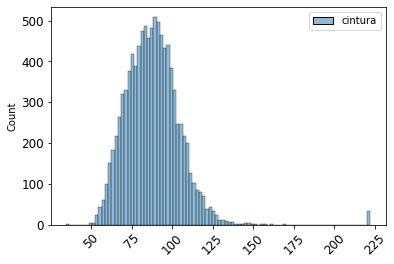

In [6]:
sns.histplot(data = df.loc[df['sexo']== 'F' ,['cintura']])

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

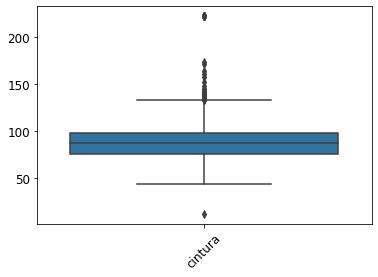

In [7]:
sns.boxplot(data = df.loc[df['sexo']== 'M' ,['cintura']])

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

In [8]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib as mpl
from sklearn import linear_model
import statsmodels.api as sm

In [11]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'edad', 'meses', 'peso', 'ropa', 'talla', 'emb', 'temb',
       'cadera', 'sexo', 'cintura', 'sistol', 'diastol', 'hpresion', 'tbrazo',
       'htension', 'PrimaryLast', 'code_upm', 'est_dis', 'est_urb', 'est_marg',
       'pondef', 'est_var'],
      dtype='object')

In [12]:
df.head()

,folio,intp,entidad,desc_ent,Unnamed: 4,Unnamed: 5,Unnamed: 6,edad,meses,peso,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,NaN,NaN,NaN,38,8,73.70,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,NaN,NaN,NaN,11,11,35.65,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,NaN,NaN,NaN,18,8,54.80,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,NaN,NaN,NaN,10,8,33.40,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,NaN,NaN,NaN,19,3,97.95,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


In [13]:
df.drop(['folio', 'intp', 'entidad','Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'edad', 'meses', 'ropa', 'talla', 'emb', 'temb',
       'cadera', 'sistol', 'diastol', 'hpresion', 'tbrazo',
       'htension', 'PrimaryLast', 'code_upm', 'est_dis', 'est_urb', 'est_marg',
       'pondef', 'est_var'],
        axis = 1, 
        inplace = True
       )

In [14]:
df.corr()

,peso,cintura
peso,1.000000,0.791677
cintura,0.791677,1.000000


In [15]:
df.dropna(inplace = True)
df

,desc_ent,peso,sexo,cintura
0,PUEBLA,73.70,F,98.70
1,DURANGO,35.65,F,64.00
2,AGUASCALIENTES,54.80,F,67.60
3,DISTRITO FEDERAL,33.40,M,60.60
4,PUEBLA,97.95,F,113.00
...,...,...,...,...
18635,VERACRUZ DE IGNACIO DE LA LLAVE,75.80,F,93.00
18636,CAMPECHE,69.40,F,103.05
18637,VERACRUZ DE IGNACIO DE LA LLAVE,46.75,M,71.35
18638,SINALOA,59.05,F,99.95


In [16]:
y = pd.DataFrame(df['peso'])
x = pd.DataFrame(df['cintura'])

lm = linear_model.LinearRegression()
model_lm = lm.fit(x, y)
model_lm

LinearRegression()

In [17]:
df.corr()

,peso,cintura
peso,1.000000,0.791677
cintura,0.791677,1.000000


In [18]:
print('The y-intercep, b0 = ', model_lm.intercept_)
print('The coefficient of Age, b1 = ', model_lm.coef_)
print('The R-squared value is = ', model_lm.score(x,y))

The y-intercep, b0 =  [-8.31365631]
The coefficient of Age, b1 =  [[0.83156762]]
The R-squared value is =  0.626752266114085


In [19]:
modelA = sm.OLS.from_formula('peso~cintura', data = df)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:17:16   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3137      0.427    -19.458      0.000      -9.151      -7.476
cintura        0.8316      0.005    173.999      0.000       0.822       0.841
==============================================================================
Omnibus:                    12737.948   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1022852.813
Skew:                          -2.683   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### peso = -8.3137 + 0.8316(cintura)
### peso = -8.3137 + 0.8316*98.7


In [20]:
peso = -8.3137 + 0.8316*98.7
print("El valor predecido del peso de una persona con cintura de de 98.7 es ", peso)

El valor predecido del peso de una persona con cintura de de 98.7 es  73.76522


In [21]:
res0 = 73.70 - 73.76522
res1 = 35.65 - 73.76522

print('Residual values of the first two rows are: ', res0, '\t', res1)

Residual values of the first two rows are:  -0.0652199999999965 	 -38.11522


In [22]:
RESI_A = resultA.resid
RESI_A

0        -0.062068
1        -9.256672
2         6.899685
3        -8.679342
4        12.296515
           ...    
18635     6.777867
18636    -7.979387
18637    -4.268694
18638   -15.751528
18639    -1.620382
Length: 18032, dtype: float64

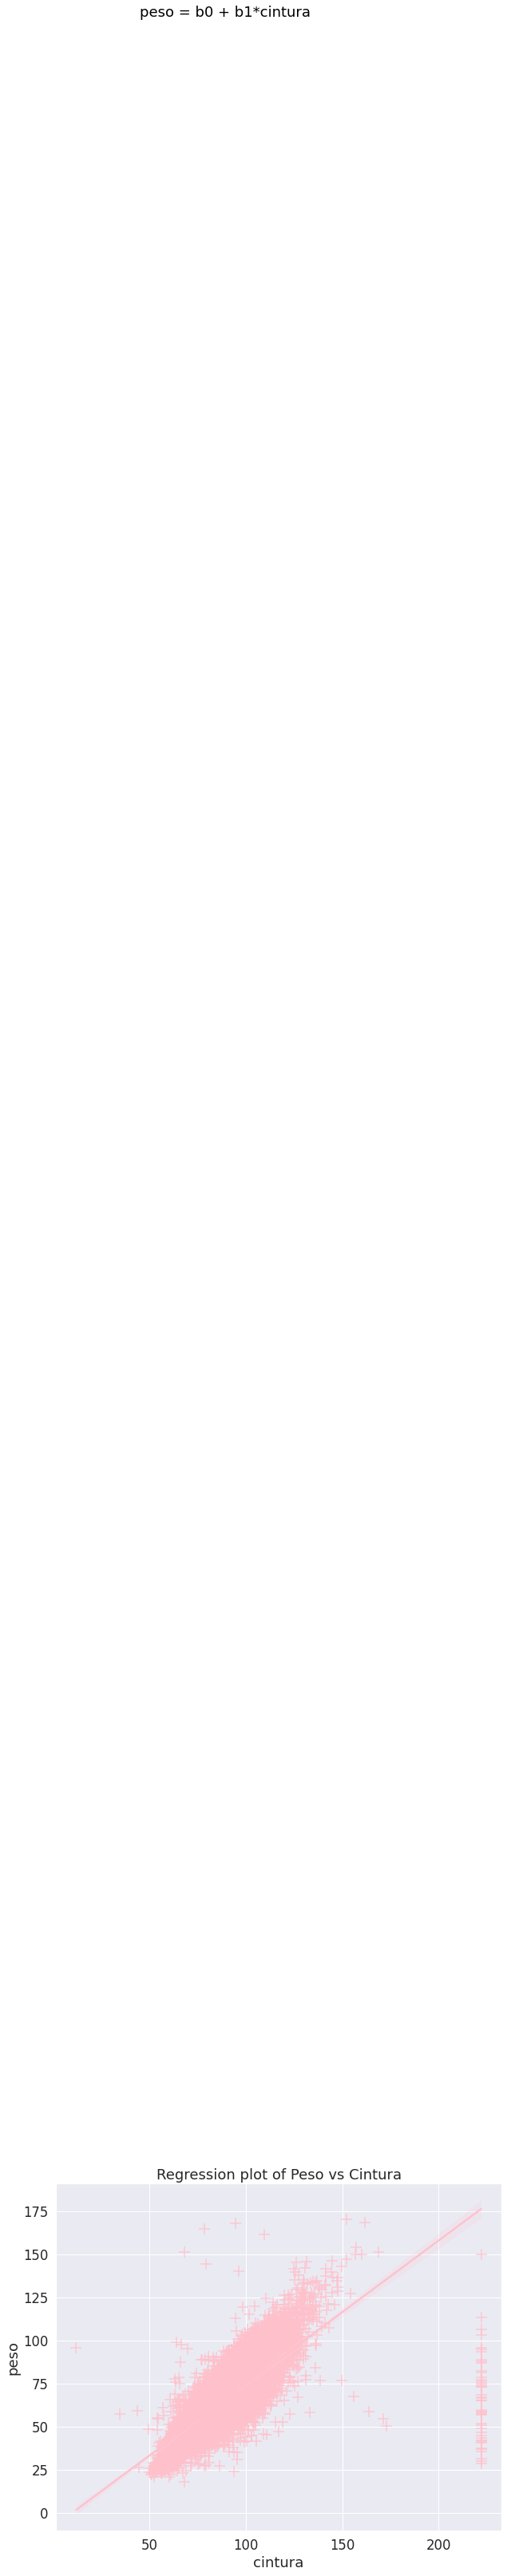

In [23]:
plt.figure(figsize= (10,8))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = 'cintura',
                 y = 'peso', 
                 data = df,
                 color = 'pink',
                 marker = '+',
                 scatter_kws = {'s':200}
                )

ax.set(xlabel ='cintura',
       ylabel = 'peso')

ax.text(45, 1450, 'peso = b0 + b1*cintura',
      horizontalalignment = 'left', size = 'medium', color ='black')

ax.set_title('Regression plot of Peso vs Cintura')
plt.show()

In [24]:
RESI_A

0        -0.062068
1        -9.256672
2         6.899685
3        -8.679342
4        12.296515
           ...    
18635     6.777867
18636    -7.979387
18637    -4.268694
18638   -15.751528
18639    -1.620382
Length: 18032, dtype: float64

In [25]:
predicted_values = resultA.fittedvalues.to_frame()
predicted_values

,0
0,73.762068
1,44.906672
2,47.900315
3,42.079342
4,85.653485
...,...
18635,69.022133
18636,77.379387
18637,51.018694
18638,74.801528


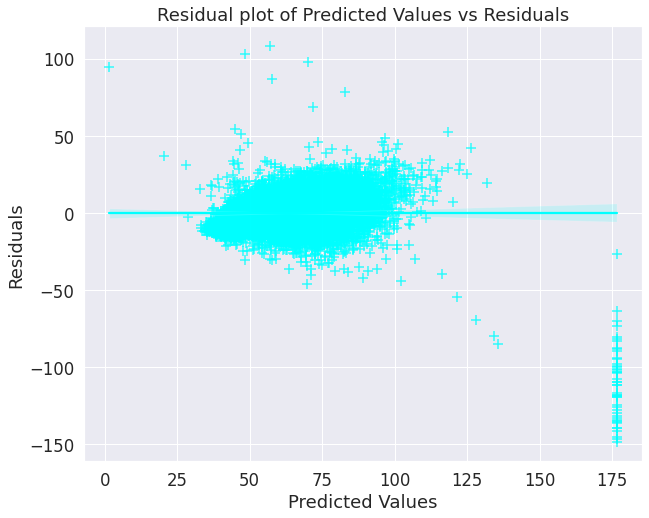

In [26]:
plt.figure(figsize= (10,8))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = predicted_values,
                 y = RESI_A, 
                 data = df,
                 color = 'aqua',
                 marker = '+',
                 scatter_kws = {'s':100}
                )

ax.set(xlabel ='Predicted Values',
       ylabel = 'Residuals')


ax.set_title('Residual plot of Predicted Values vs Residuals')
plt.show()

In [27]:
modelB = sm.OLS.from_formula('peso~cintura+sexo', data = df)
resultB = modelB.fit()
resultB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                 1.641e+04
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:18:47   Log-Likelihood:                -68158.
No. Observations:               18032   AIC:                         1.363e+05
Df Residuals:                   18029   BIC:                         1.363e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7134      0.424    -25.290      0.000     -11.544      -9.883
sexo[T.M]      4.8943      0.159     30.851      0.000       4.583       5.205
cintura        0.8337      0.005    178.965      0.000       0.825       0.843
==============================================================================
Omnibus:                    13472.230   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1218552.370
Skew:                          -2.901   Prob(JB):                         0.00
Kurtosis:                      42.852   Cond. No.                         481.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### peso =  b0 + b1cintura + b2sexo(male+female)
### peso = -10.7134 + 0.8337(cintura) + 4.8943(sexo masculino)

In [32]:
df.head()

,desc_ent,peso,sexo,cintura
0,PUEBLA,73.70,F,98.7
1,DURANGO,35.65,F,64.0
2,AGUASCALIENTES,54.80,F,67.6
3,DISTRITO FEDERAL,33.40,M,60.6
4,PUEBLA,97.95,F,113.0


In [29]:
salaryM = -10.7134 + (0.8337*98.70) + (4.8943*1)
salaryf = -10.7134 + (0.8337*98.70) + (4.8943*0)

In [31]:
print('Peso de hombre con cintura de 98.7 es ',salaryM)
print('Peso de mujer con cintura de 98.7 es ',salaryf)

Peso de hombre con cintura de 98.7 es  76.46709
Peso de mujer con cintura de 98.7 es  71.57279
